<a href="https://colab.research.google.com/github/DAEHO0/python/blob/main/230922_KingCountry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 패키지 및 데이터 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/KingCountry_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### **데이터 정제**

In [2]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.duplicated().sum()

0

### **데이터 분포 확인**

In [5]:
df.shape

(21613, 21)

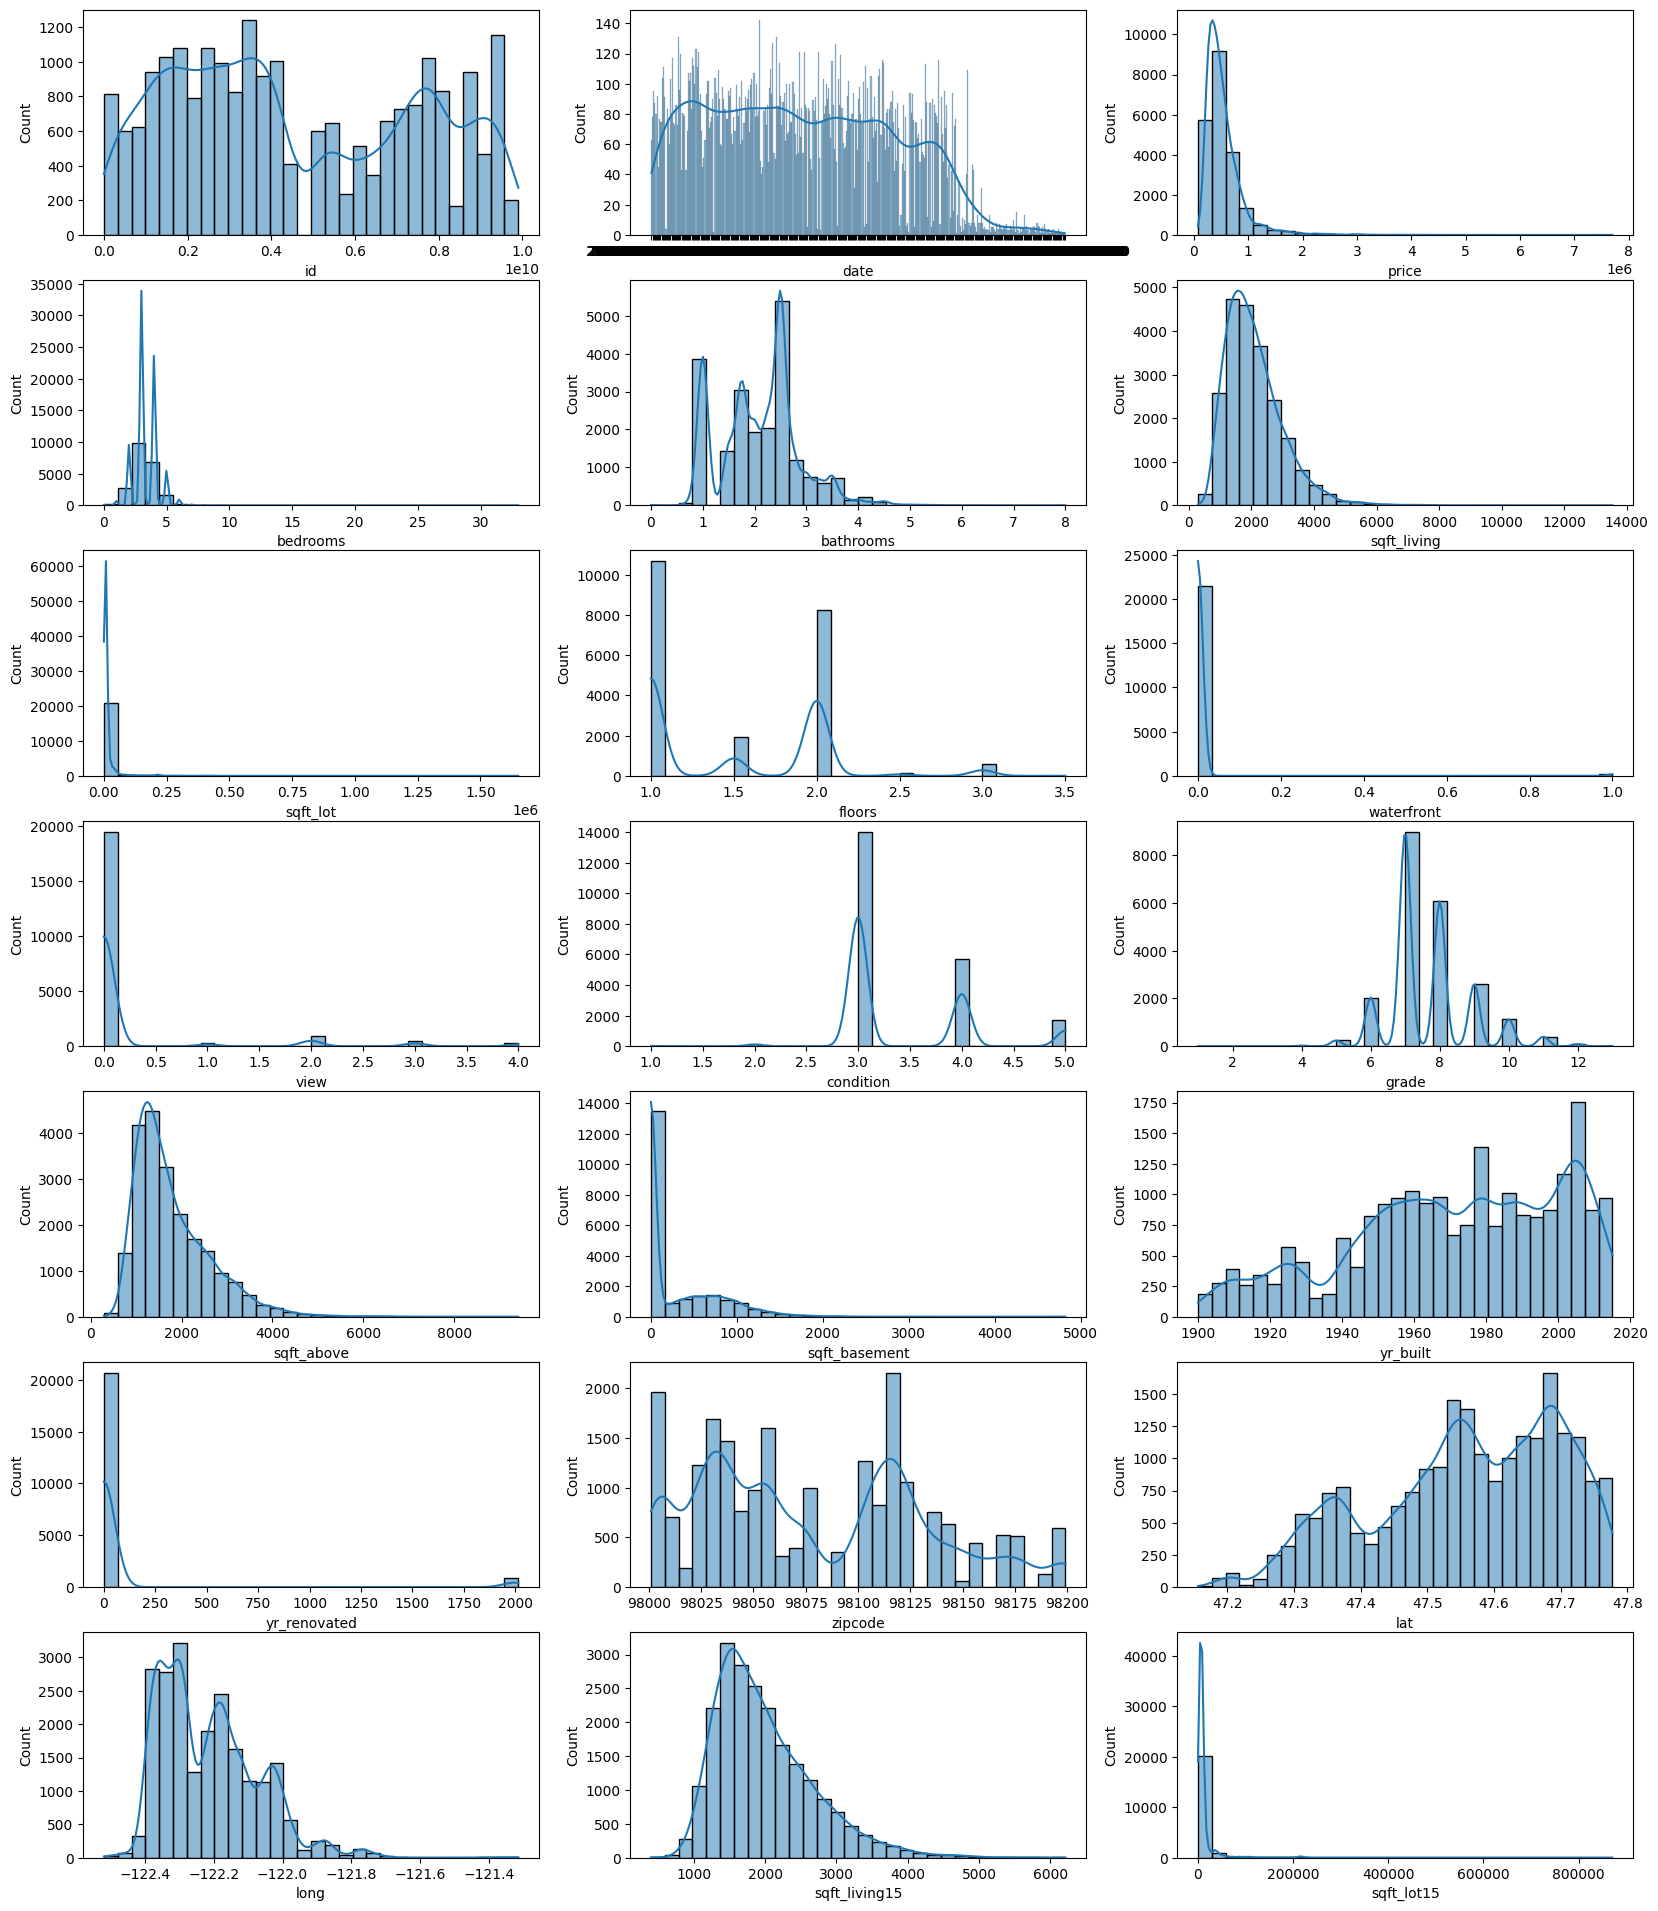

In [6]:
# 데이터 분포 확인 - 히스토그램
nrows = 7
ncols = 3

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 24)

for i in range(nrows):
  for j in range(ncols):
    num = i * ncols + j
    sns.histplot(x = df.columns[num], data = df, kde = True, bins = 30, ax = axs[i][j])

# 가격대가 왜 0~1 사이의 값으로 되어있는지?
# 일단 0~1 사이에 가격대 분포가 많음

In [7]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

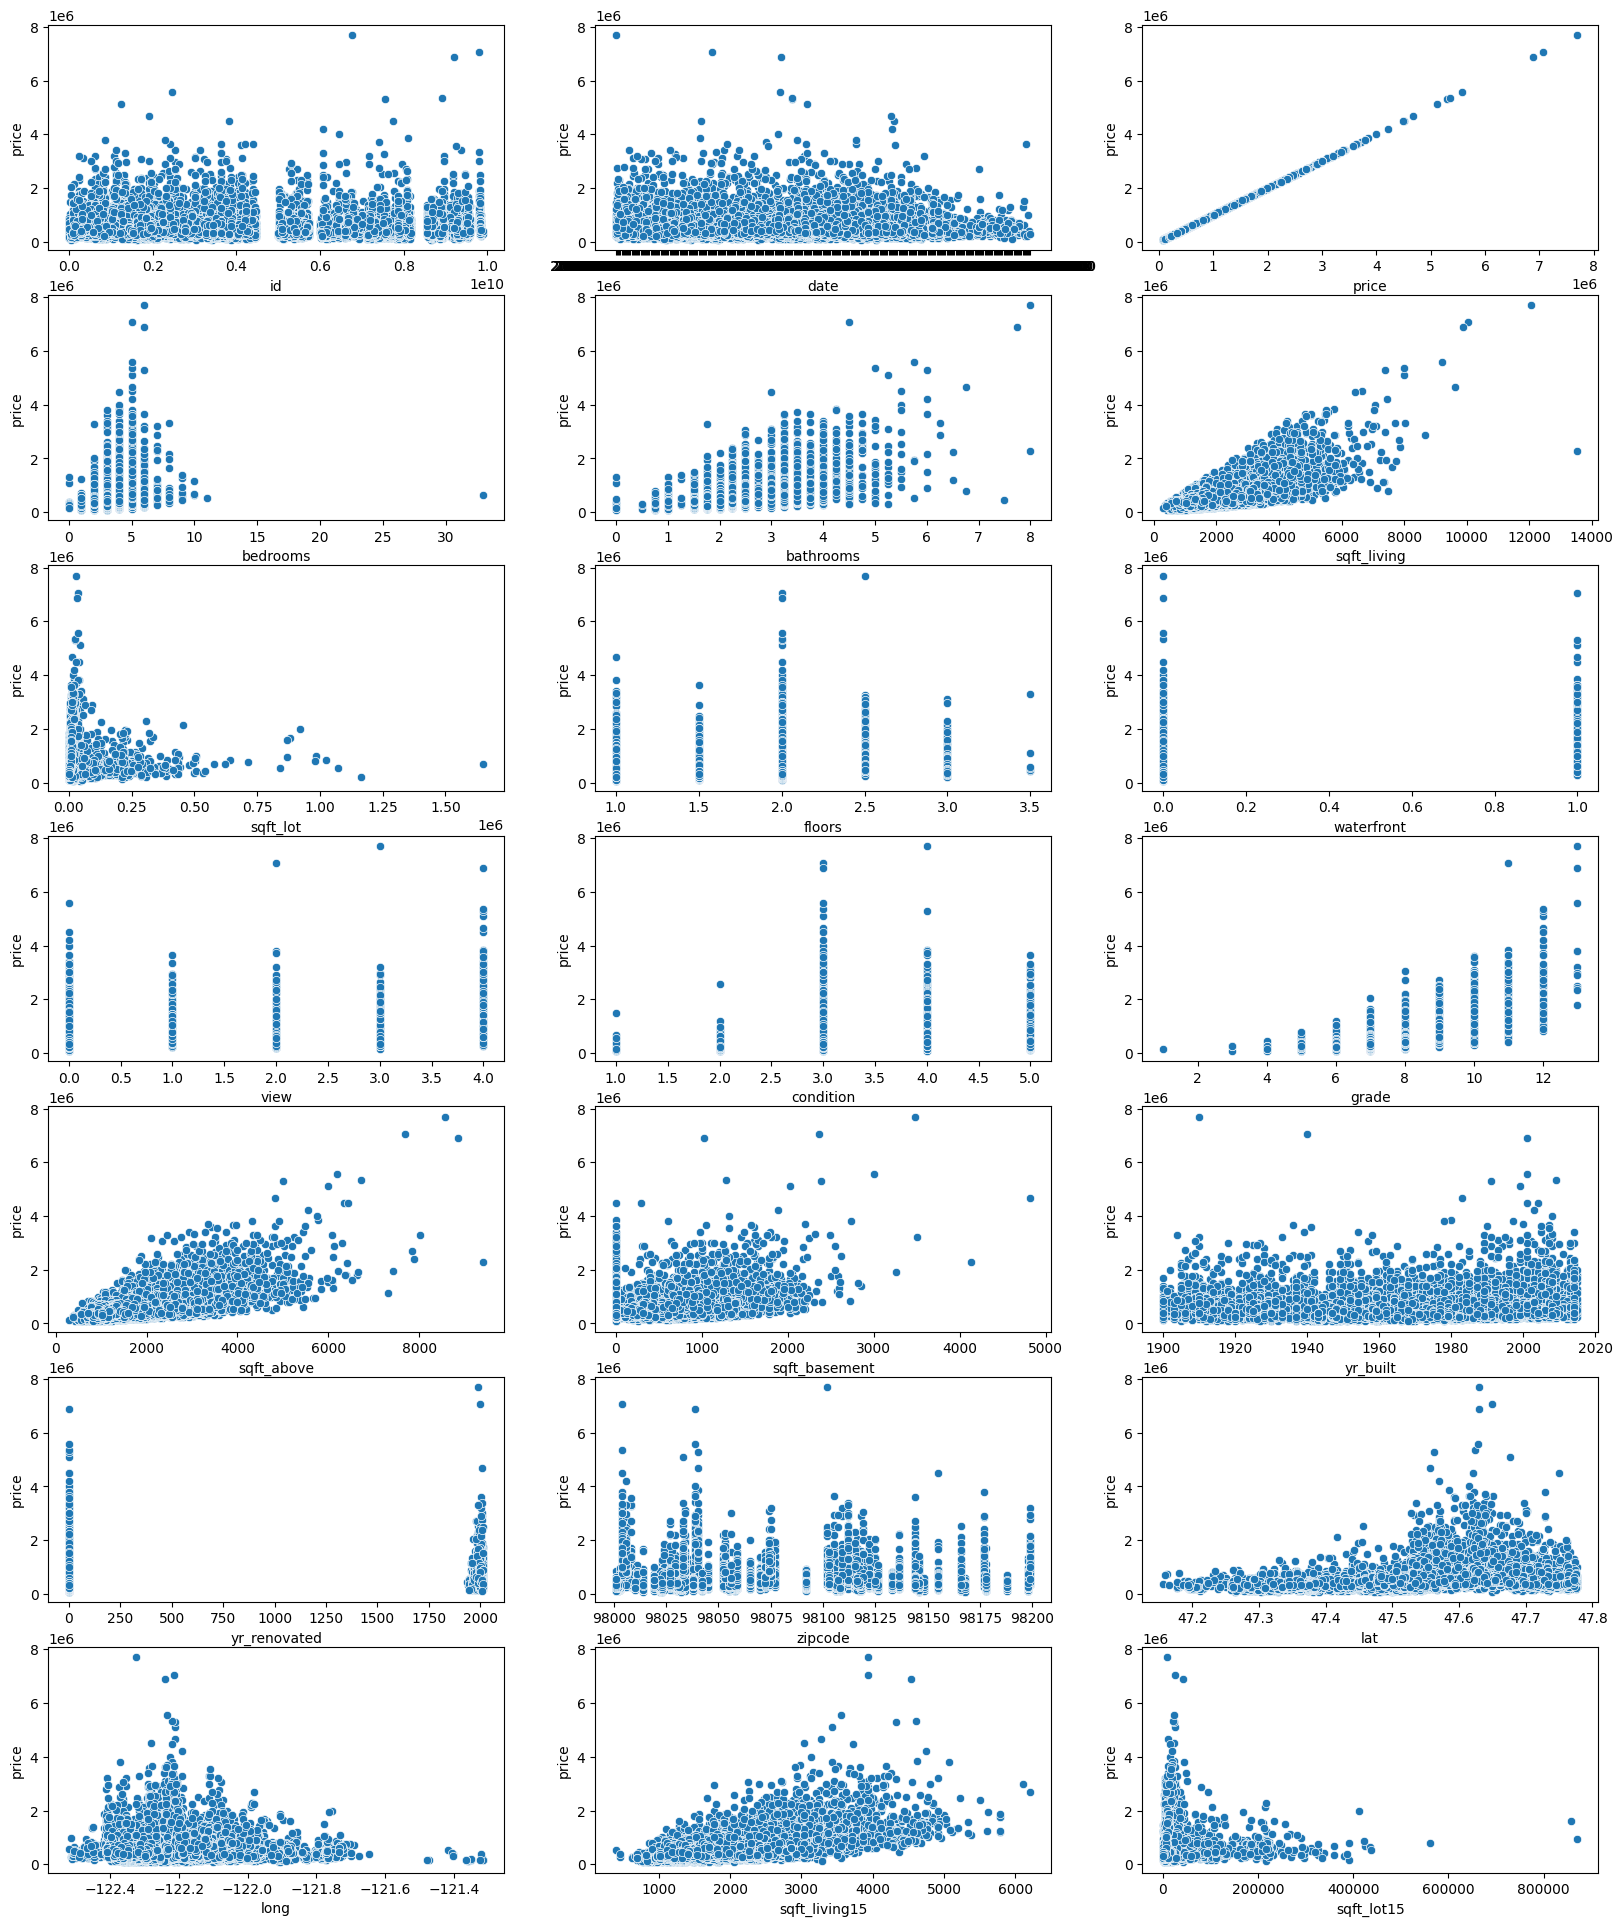

In [8]:
# 데이터 분포 확인 - 산점도
nrows = 7
ncols = 3

fig, axs = plt.subplots(nrows, ncols)
fig.set_size_inches(20, 24)

for i in range(nrows):
  for j in range(ncols):
    num = i * ncols + j
    sns.scatterplot(x = df.columns[num], y = 'price', data = df, ax = axs[i][j])

# price와 상관성이 높은 변수 sqft_living, sqft_above

In [9]:
# 데이터 분포 확인 - 변수 간 상관관계
df.corr()

# 양의 상관관계: sqft_living, grade, sqft_above
# 음의 상관관계:
# 관련성 없음: id, zipcode

<ipython-input-9-84a356ba2a9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<ipython-input-10-c5e592fba82a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = False)


<Axes: >

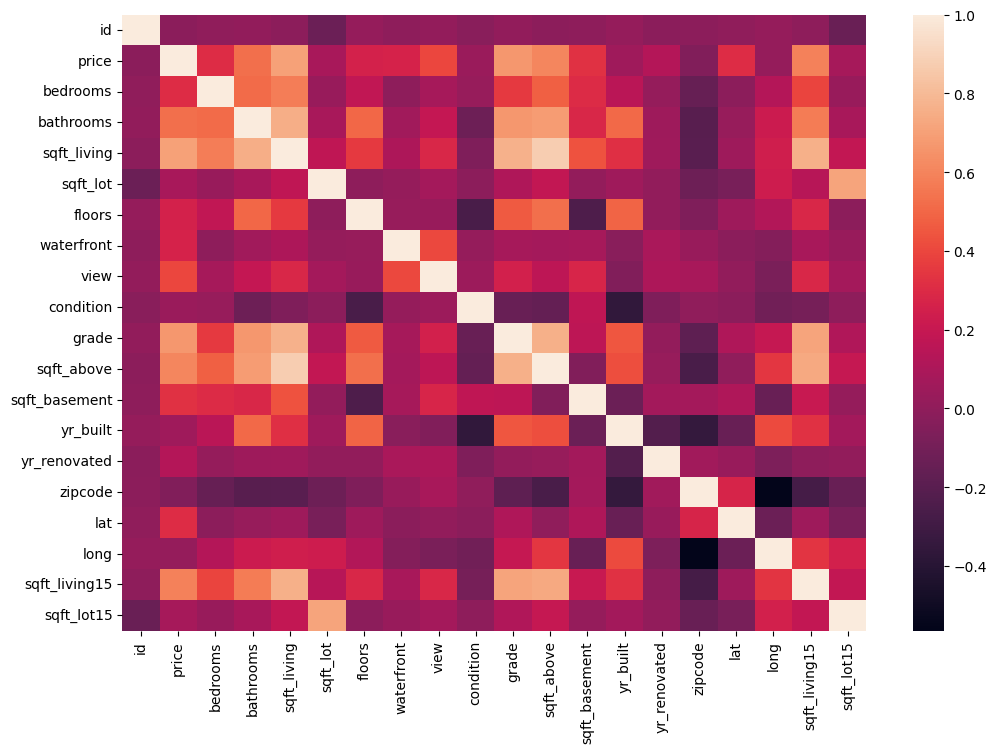

In [10]:
# 데이터 분포 확인 - 변수 간 상관관계(히트맵)
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = False)

In [11]:
np.abs(df.corr()['price'].sort_values(ascending = False))

# 높은 상관관계 sqft_living > grade > sqft_above

<ipython-input-11-b471f2141538>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.abs(df.corr()['price'].sort_values(ascending = False))


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
zipcode          0.053203
Name: price, dtype: float64

### **선형회귀 모델**

In [12]:
# 데이터 분할
from sklearn.model_selection import train_test_split

# 종속변수
y = df['price']

# 타겟변수 price, date를 제외한 모든 변수를 독립변수 X로 할당
X = df.drop(['price', 'date'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [13]:
# 선형회귀 모델
from sklearn.linear_model import LinearRegression

lr_mdl = LinearRegression()
lr_mdl.fit(X_train, y_train)

print('weight:', lr_mdl.coef_)
print('bias:', lr_mdl.intercept_)

weight: [-1.85213333e-06 -3.23492328e+04  3.75862154e+04  1.06479407e+02
  8.41657899e-02  9.93804566e+03  5.62724683e+05  5.19236609e+04
  2.65663711e+04  9.54343949e+04  6.95430305e+01  3.69363770e+01
 -2.54852695e+03  2.15814356e+01 -5.52294953e+02  6.13552076e+05
 -2.02192018e+05  1.92019246e+01 -3.32932516e-01]
bias: 4630224.263395518


In [14]:
# 선형 회귀 모델의 가중치를 값으로, 컬럼명을 인덱스로 갖는 시리즈 생성
coef = pd.Series(data = np.round(lr_mdl.coef_, 1), index = X.columns)
coef

# lat 컬럼의 가중치 절대값이 가장 큼

id                   -0.0
bedrooms         -32349.2
bathrooms         37586.2
sqft_living         106.5
sqft_lot              0.1
floors             9938.0
waterfront       562724.7
view              51923.7
condition         26566.4
grade             95434.4
sqft_above           69.5
sqft_basement        36.9
yr_built          -2548.5
yr_renovated         21.6
zipcode            -552.3
lat              613552.1
long            -202192.0
sqft_living15        19.2
sqft_lot15           -0.3
dtype: float64

<Axes: >

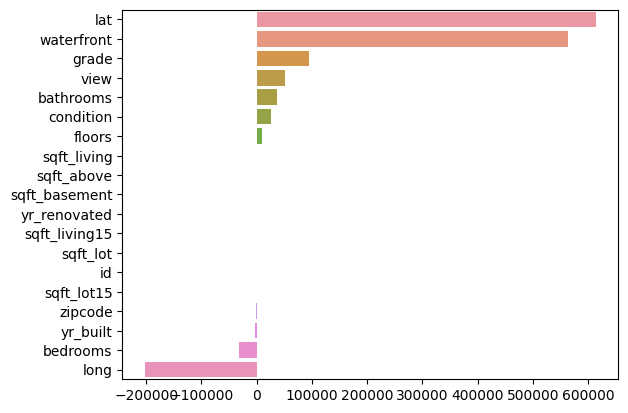

In [15]:
# 각 컬럼의 가중치 값을 막대그래프로 나타냄
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)

In [16]:
# 학습한 선형 회귀 모델의 성능 확인을 위해 MSE, RMSE, R^2(결정계수) 출력
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  print('MSE : {0:.3f}, RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse, rmse, r2))

y_pred = lr_mdl.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 48337615045.737, RMSE : 219858.170, r2 : 0.690


In [17]:
# 실제값과 예측값의 차이
result = pd.DataFrame({'y': y_test.values, 'y_pred': y_pred, 'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by = ['diff'], ascending = False)

,y,y_pred,diff
3822,7700000.0,3.284523e+06,4.415477e+06
3646,6885000.0,2.734848e+06,4.150152e+06
1759,7062500.0,3.114200e+06,3.948300e+06
3673,5300000.0,2.660352e+06,2.639648e+06
741,4208000.0,1.920828e+06,2.287172e+06
...,...,...,...
2777,245000.0,2.451854e+05,1.854298e+02
561,703770.0,7.039302e+05,1.602381e+02
1368,684000.0,6.838599e+05,1.401244e+02
2435,250000.0,2.501032e+05,1.031629e+02


### **선형회귀 모델 응용**

In [18]:
# 회귀 모델 F값 기준, 3개의 독깁변수를 선택
from sklearn.feature_selection import SelectKBest, f_regression

X_selected = SelectKBest(score_func = f_regression, k = 3)
X_selected.fit_transform(X, y)
features = X.columns[X_selected.get_support()]
print('features = {}'.format(features))

# 선택된 컬럼 sqft_living, grade, sqft_above

features = Index(['sqft_living', 'grade', 'sqft_above'], dtype='object')


In [20]:
# 3개의 독립변수만 사용하여 회귀 모델 생성

# 데이터 분할
X_selected = df[features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3, random_state = 1)

# 학습
lr_mdl2 = LinearRegression()
lr_mdl2.fit(X_train, y_train)

# 예측 및 평가
y_pred = lr_mdl2.predict(X_test)
printRegressorResult(y_test, y_pred)

# 결정계수(r2) 값 0.545로 성능이 떨어짐

MSE : 70958649200.282, RMSE : 266380.647, r2 : 0.545


### **다항회귀 모델**

In [24]:
# PolynomialFeatures() 클래스를 사용하여 2차원 다항회귀 모델 학습
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)  # X는 입력 피처 데이터

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1)

poly_mdl = LinearRegression()
poly_mdl.fit(X_train, y_train)

y_pred = poly_mdl.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE : 250427158732.681, RMSE : 500426.976, r2 : -0.605
